<img src="https://miro.medium.com/max/1130/1*3sr-fMg4S_yEncGsIjyG9A.png" alt="Drawing" style="width: 600px;"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
df=pd.read_csv("/Supermarket Transactions.csv") #Add the location of the Supermarket Transaction csv file

In [3]:
df.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income $,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,18-12-2011,7223,F,M,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,$27.38
1,2,20-12-2011,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,$14.90
2,3,21-12-2011,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,$5.52
3,4,21-12-2011,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,$4.44
4,5,22-12-2011,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,$14.00


Replacing the '$' sign in Revenue because the Revenue is taken as an string. It has be in float

In [4]:
df['Revenue']=df['Revenue'].str.replace('$','')

Converting the column Revenue from object to float

In [6]:
df["Revenue"]=df["Revenue"].astype(str).astype(float)

In [5]:
df.dtypes

Transaction            int64
Purchase Date         object
Customer ID            int64
Gender                object
Marital Status        object
Homeowner             object
Children               int64
Annual Income $       object
City                  object
State or Province     object
Country               object
Product Family        object
Product Department    object
Product Category      object
Units Sold             int64
Revenue               object
dtype: object

## Dtale

Analyzing a data helps us to gather information about the data like how it is stored, what are the different attributes and their properties. Data Analysis can be performed using different python libraries like pandas, etc.

DTale is a Flask and React-based powerful tool which is used to analyze and visualize pandas data structure seamlessly. It supports different objects like Data Frame, Series, etc. It works well on both the Jupyter notebook and the command-line interface. 

DTale is a Graphical Interface where we can select the data we want to analyze and how to analyze using different graphs and plots. 

D-Tale is a recently created library (end of February 2020) that allows us to visualize a Pandas DataFrame. It generates an interactive graphical interface in which we can define what we want the data to look like and do an exploratory analysis of data as we like.

In [6]:
import dtale

C:\Users\Madhivathani\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Madhivathani\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
dtale.show(df)

{'metas': '<meta http-equiv="X-UA-Compatible" content="IE=edge">\n      <meta charset="UTF-8">', 'title': 'Dash', 'css': '<link rel="stylesheet" href="/css/main.css">\n<link rel="stylesheet" href="/css/dash.css">\n<link rel="stylesheet" href="/css/github_fork.css">', 'config': '<script id="_dash-config" type="application/json">{"url_base_pathname": null, "requests_pathname_prefix": "/charts/", "ui": false, "props_check": false, "show_undo_redo": false, "suppress_callback_exceptions": true, "update_title": "Updating..."}</script>', 'scripts': '<script src="/charts/_dash-component-suites/dash_renderer/polyfill@7.v1_8_2m1603170988.8.7.min.js"></script>\n<script src="/charts/_dash-component-suites/dash_renderer/react@16.v1_8_2m1603170988.13.0.min.js"></script>\n<script src="/charts/_dash-component-suites/dash_renderer/react-dom@16.v1_8_2m1603170988.13.0.min.js"></script>\n<script src="/charts/_dash-component-suites/dash_renderer/prop-types@15.v1_8_2m1603170988.7.2.min.js"></script>\n<scrip

Dtale show us the data in the same way that pandas would. The only difference is the menu in the top left corner that allows us to do many things with the data. Next to that menu it shows us the number of columns and rows our dataset has.

Clicking on any of the column headings opens a drop-down menu that gives us options to sort the data and display it exactly as we want it.

One of the most interesting options we can find in this menu are Describe that shows us a statistical analysis of all the columns. For each column it shows the Summary (max,mean,min,standard deviation, unique, variance, skewness and much more), Histogram with a fixed bins (We can also change the bins), Value Counts(Shows the frequency of the categorical variables using a bar Graph), Boxplot and also shows the outliers value for a column.

The below code shows all the characteristics and Summary for the column Revenue.

In [13]:
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

# main statistics
stats = df['Revenue'].describe().to_frame().T
# sum
stats['sum'] = df['Revenue'].sum()
# median
stats['median'] = df['Revenue'].median()
# mode
mode = df['Revenue'].mode().values
stats['mode'] = np.nan if len(mode) > 1 else mode[0]
# var
stats['var'] = df['Revenue'].var()
# sem
stats['sem'] = df['Revenue'].sem()
# skew
stats['skew'] = df['Revenue'].skew()
# kurt
stats['kurt'] = df['Revenue'].kurt()
uniq_vals = df['Revenue'].value_counts().sort_values(ascending=False)
uniq_vals.index.name = 'value'
uniq_vals.name = 'count'
uniq_vals = uniq_vals.reset_index()
uniq_vals.loc[:, 'type'] = 'float64'

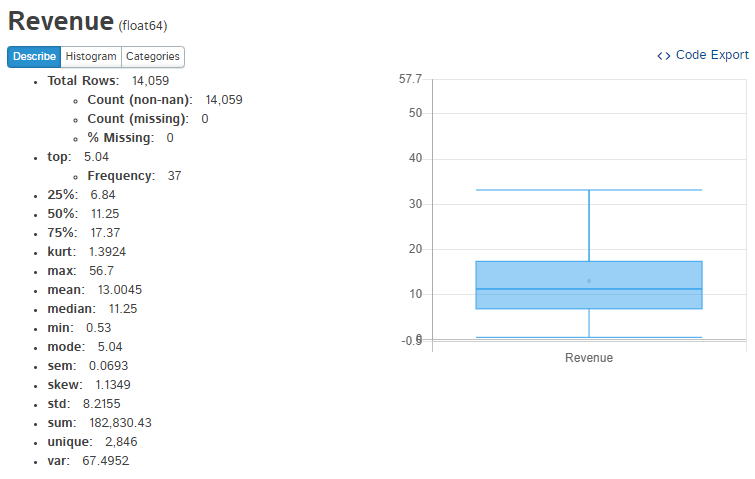

The below code shows the Histogram for the column Revenue with bins 20.

In [11]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = np.histogram(df[~pd.isnull(df['Revenue'])][['Revenue']], bins=20)
# main statistics
stats = df['Revenue'].describe().to_frame().T
stats

,count,mean,std,min,25%,50%,75%,max
Revenue,14059.0,13.004512,8.215543,0.53,6.84,11.25,17.37,56.7


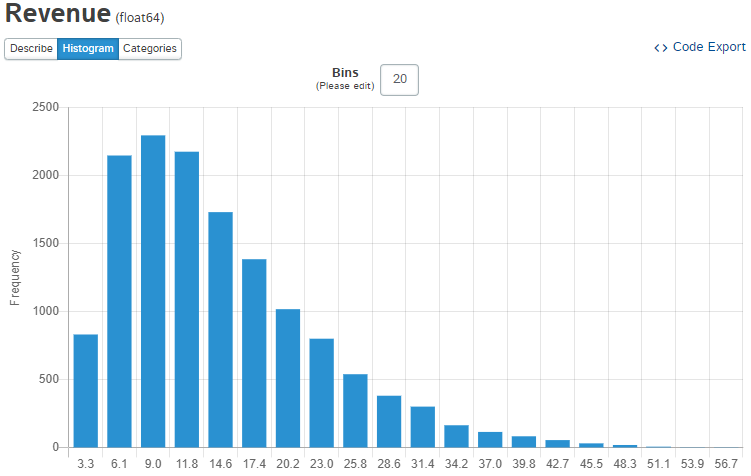

The below code shows all the Outliers value for the column Revenue.

In [16]:
s = df['Revenue']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
outliers

{55: 40.83,
 63: 34.56,
 76: 35.26,
 83: 36.5,
 86: 36.48,
 186: 44.78,
 253: 37.65,
 288: 36.92,
 357: 38.07,
 463: 49.25,
 511: 35.98,
 542: 34.8,
 562: 41.53,
 619: 35.55,
 640: 33.88,
 701: 41.04,
 717: 35.37,
 789: 38.42,
 826: 33.48,
 905: 37.58,
 941: 36.06,
 981: 44.2,
 1019: 39.1,
 1035: 35.33,
 1057: 33.4,
 1119: 33.5,
 1215: 38.66,
 1218: 43.85,
 1298: 33.76,
 1322: 43.23,
 1347: 38.6,
 1356: 34.67,
 1440: 49.0,
 1479: 33.97,
 1490: 41.04,
 1593: 33.67,
 1694: 33.66,
 1719: 34.41,
 1806: 33.23,
 1888: 35.52,
 1974: 37.0,
 2015: 40.32,
 2044: 34.68,
 2054: 33.76,
 2086: 42.44,
 2089: 36.89,
 2195: 41.47,
 2207: 34.66,
 2320: 37.92,
 2343: 39.2,
 2391: 39.83,
 2394: 36.66,
 2396: 36.62,
 2429: 34.92,
 2446: 39.75,
 2460: 37.37,
 2466: 39.15,
 2468: 37.24,
 2475: 37.93,
 2560: 41.69,
 2654: 34.57,
 2735: 45.96,
 2736: 36.67,
 2779: 34.2,
 2855: 39.5,
 2882: 38.5,
 2947: 35.88,
 2951: 50.17,
 3004: 43.12,
 3013: 40.82,
 3095: 35.25,
 3156: 36.9,
 3182: 36.75,
 3199: 40.37,
 3202

The below code shows the bar graph for the column Annual Income with respect to the count. From this graph we can infer which range of Annual Income is high with respect to the customers.

In [40]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = pd.value_counts(df[~pd.isnull(df['Annual Income $'])]['Annual Income $'])
chart

$30K - $50K      4601
$10K - $30K      3090
$50K - $70K      2370
$70K - $90K      1709
$130K - $150K     760
$110K - $130K     643
$90K - $110K      613
$150K +           273
Name: Annual Income $, dtype: int64

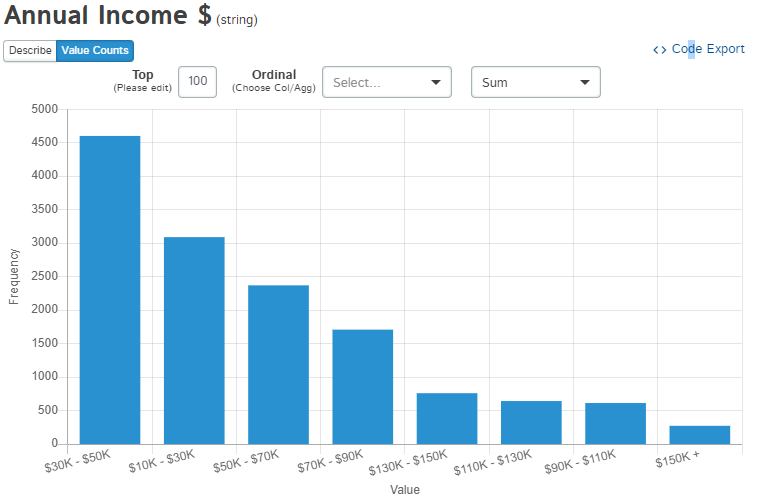

From the above bar graph on Annual Income, we can conclude that the most of the customers have an Annual Salary of $30k-$50k. And the least is $150k+

The below code shows the bar graph for the Categorical variable City with respect to the count.

In [20]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = pd.value_counts(df[~pd.isnull(df['City'])]['City'])
chart

Salem            1386
Tacoma           1257
Los Angeles       926
Seattle           922
Portland          876
Spokane           875
San Diego         866
Hidalgo           845
Bremerton         834
Beverly Hills     811
Merida            654
Vancouver         633
San Andres        621
Orizaba           464
Camacho           452
Acapulco          383
Yakima            376
Mexico City       194
Victoria          176
Walla Walla       160
Bellingham        143
San Francisco     130
Guadalajara        75
Name: City, dtype: int64

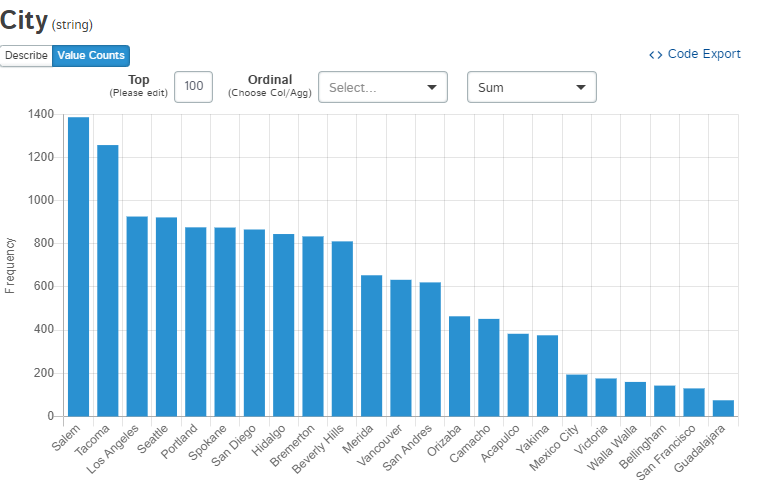

The various options available using this Dtale menu are Describe, Custom Filter, Correlations, Build Columns, Charts, Duplicates, Summarize data, Highlight Outliers, Highlight Missing, Code Exports etc.,

The below code gives the Pearson Correlation for the Numerical variables in the dataset. In my dataset I have chosen Children, Units Sold and Revenue to see the correlation. it will show us how correlated the variables are with each other. If the value is positive then it is Positive correlation which means when one variable increases the other variable also increases.If the value is negative then it is Negative correlation which means when one variable increases the other variable decreases.

In [9]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

corr_cols = [
	 'Children', 'Units Sold', 'Revenue'
]
corr_data = np.corrcoef(df[corr_cols].values, rowvar=False)
corr_data = pd.DataFrame(corr_data, columns=[corr_cols], index=[corr_cols])
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()
corr_data

,level_0,Children,Units Sold,Revenue
0,Children,1.000000,0.123348,0.069454
1,Units Sold,0.123348,1.000000,0.299760
2,Revenue,0.069454,0.299760,1.000000


The below code is to check which Product Family is mostly purchased by the customers of that supermarket. From this we can infer that these product line are selling high and we can make certain decisions based on stocking and procurement based on this graph.

In [11]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = pd.value_counts(df[~pd.isnull(df['Product Family'])]['Product Family'])

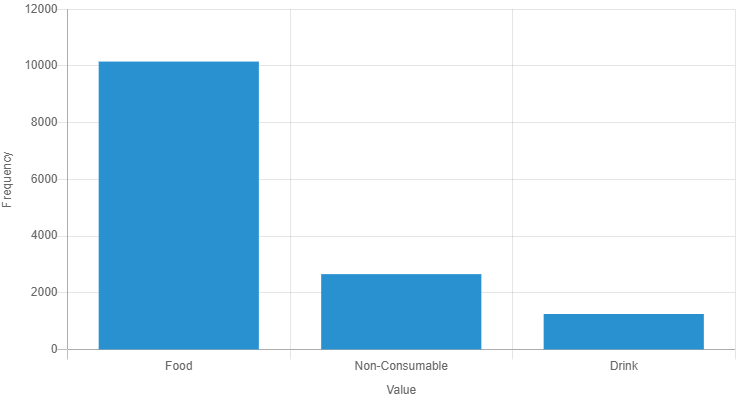

From the above graph we can conclude that the Food is the product Family which is mostly purchased by the customers. More than 2/3 of the customers are purchasing Food. The least is Drink.

The below code shows the Frequency of Numerical variable Units Sold. The bar graph gives the answer for the highest number of quantity bought by the customer.

In [13]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = pd.value_counts(df[~pd.isnull(df['Units Sold'])]['Units Sold'])

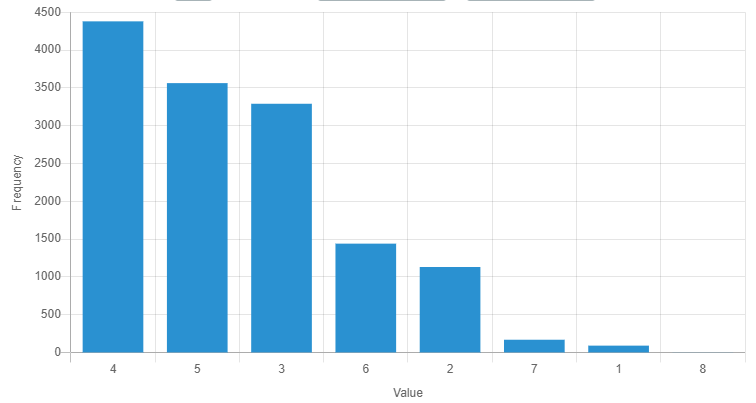

From the abover graph, we can conclude that the quantity purchased by the customers is high with 4 units. The least is the quantity with 8 units.

 One of the fanciest options is the heatmap. It shows us colors in the data table according to the value of each cell.

In the Charts option we can generate the graphics we want among the available ones (Line, Bars, ScatterPlot, Circular, Wordcloud, Heatmap, 3D ScatterPlot, and Surface.

We can make all types of chart easily without knowing the code and syntax. In that way charts is very useful.

## Sweetviz

Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

There are 3 main functions for creating reports:

analyze()
compare()
compare_intra()

Here I have used analyze() to create a html report

In [14]:
import sweetviz as sv

In [15]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the report we can clearly see what are the different attributes of the datasets and their characteristics including the missing values, distinct values, max, min, median, mode, average, Range , IQR, S.d, Variance, Kurtosis and Skewness.

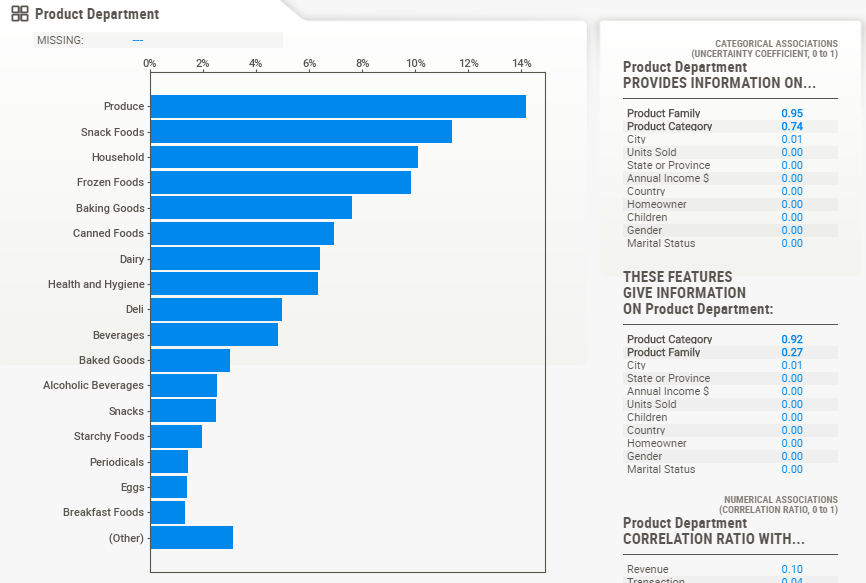

The above graph using Sweetviz shows the graph with respect to total percentage of Product Department and also the Features
which give information on Product Department variable.

It also shows the Numerical Correlations and also Categorical Correlations. Only Sweetviz shows categorical Associations out of the other libraries.

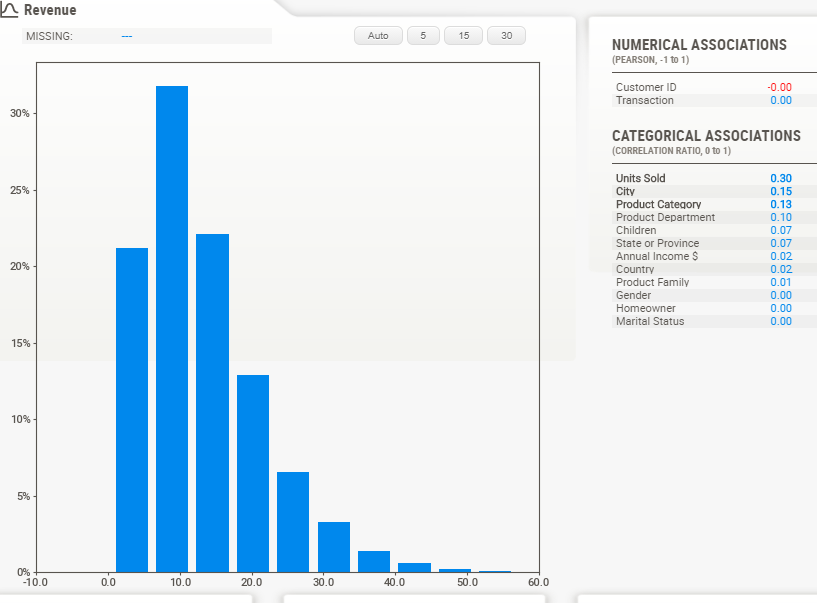

The above graph shows the Bar graph for the numerical variable Revenue. Swwetviz always shows the association or correlation with othr categorical variable.

It also shows the Histogram or Bargraph for all the categorical and numerical variables with respect to the count. It also shows the most frequent values, Smallest and Largest values.

EDA report is ready and contains a lot of information for all the attributes. It’s easy to understand and is prepared in just 3 lines of code.

Other than this Sweetviz can also be used to visualize the comparison of test and train data. For comparison we can divide the total dataset into 2 parts.Compare() function of Sweetviz is used for comparison of the dataset. In this report, we can easily compare the data and the comparison between the datasets test and train data. 